https://nbviewer.org/github/fastai/fastbook/blob/master/02_production.ipynb

Suggest that we iterate from end to end in project, don't spend months fine-tuning your model or polishing the perfect GUI, or labelling the perfect dataset

Complete the project end to end, you will see where the trickiest bits are, and what makes the biggest difference to the final result

Experiment and explore what notebooks and the dataset provide

With end to end iteration approach, you will get better understanding of how much data you really need
- also show that the idea works, get buy in from organizational context

Start with something where you can find an example online where someone has had good results with something that is somewhat familiar to what you want to achieve

# State of deep learning
IS always changing

## Computer vision
Object recognition - recognize what items are in an image
Object detection - recognize what objects and in an image and highlight the location and name of the object

Deep learning algorithms are generally not good at recognizing images that are significantly different in structure or style to those used to train the model
- e.g. if there are no black and white image in training set
- hand drawn images

No general way to check what types of images are missing in your training set.
out of domain data => when unexpected image types arise in the data when the model is being used in production

Object detection systems challenges -> image labelling can be slow and expensive
- data augmentation - to synthetically generate variations of input images, such as by rotating them or changing their brightness and contrast
    - also works well for text and other types of models

It might be possible to turn a problem into a computer vision problem, using a bit of creativity
- e.g. convert sound acoustic waveforms into images and training a model on these images

## Text (natural language processing)
 As a rule of thumb, text generation models will always be technologically a bit ahead of models recognizing automatically generated text. For instance, it is possible to use a model that can recognize artificially generated content to actually improve the generator that creates that content, until the classification model is no longer able to complete its task.
 
 Despite these issues, deep learning has many applications in NLP: it can be used to translate text from one language to another, summarize long documents into something that can be digested more quickly, find all mentions of a concept of interest, and more. Unfortunately, the translation or summary could well include completely incorrect information! However, the performance is already good enough that many people are using these systems—for instance, Google's online translation system (and every other online service we are aware of) is based on deep learning.

# Drivetrain Approach
To ensure that your modeling work is useful in practice, consider how your work will be used

Drivetrain Approach
- Considering your objective, think about what actions you can take to meet that objective and what data you have (or can acquire) that can help
- Then build a model that you can use to determine the best actions to take to get the best results in terms of your objective


Searching for grizzly bear


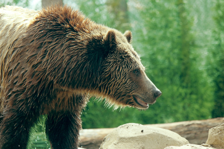

In [4]:
# https://forums.fast.ai/t/duckduckgo-search-not-working/105738/16
from fastbook import *

def search_images(term, max_count=50):
    print(f"Searching for {term}")
    return search_images_ddg(term, max_images=max_count)

grizzly_bear_imgs = search_images("grizzly bear", 10)
dest = "images/grizzly_bear.jpg"
download_url(grizzly_bear_imgs[0], dest)

image = Image.open(dest)
image.to_thumb(224,224)

In [1]:
from fastbook import *

def search_images(term, max_count=50):
    print(f"Searching for {term}")
    return search_images_ddg(term, max_images=max_count)

bear_types = "grizzly", "black", "teddy"
path = Path("bears")
print(path.exists())

if not path.exists():
    path.mkdir()
    for type in bear_types:
        dest = (path/type)
        dest.mkdir(exist_ok=True)
        results = search_images(f"{type} bear", max_count=100)
        print(results)
        download_images(dest, urls=results)


False
Searching for grizzly bear
['https://www.environews.tv/wp/wp-content/uploads/2016/03/Yellowstone-Grizzly-Bear-4.jpg', 'https://bear.org/wp-content/uploads/2008/01/Grizzly-on-log.jpg', 'https://static.wixstatic.com/media/69b040_78f0b75992214f8ab853fe4429fbc54e~mv2_d_2605_1534_s_2.jpg', 'http://2.bp.blogspot.com/-p-QKKk3T8O0/UQN3a5YSALI/AAAAAAAAFcE/iTlNg3jee9A/s1600/Grizzly+Bear-2013-0pic-03.jpg', 'https://cdn.britannica.com/18/161718-050-2DB34DD6/Grizzly-bear.jpg', 'https://media.spokesman.com/photos/2018/08/18/Grizzly_Bears_Montana.JPG.jpg', 'https://images4.alphacoders.com/102/1028129.jpg', 'https://4.bp.blogspot.com/-urCvus2TcW0/UQ_A2634tyI/AAAAAAAAAOo/YJlK0x0rAQI/s1600/Grizzly-Bear.jpg', 'https://bloximages.chicago2.vip.townnews.com/trib.com/content/tncms/assets/v3/editorial/8/f1/8f178f14-cc32-52db-bb1f-fa2a547cb97b/5aa33eff5b230.image.jpg?resize=1200%2C828', 'https://upload.wikimedia.org/wikipedia/commons/7/7e/Grolar.JPG', 'https://a-z-animals.com/media/Grizzly-Bear-Ursus-Arc

In [2]:
fns = get_image_files(path)
fns

(#280) [Path('bears/black/01cd9182-cdad-47e6-afef-ee7ab65ada07.jpg'),Path('bears/black/0253c66a-3c28-4e34-867e-e028bb035f33.jpg'),Path('bears/black/0363c29f-327a-42cb-ac53-0d378708804e.jpg'),Path('bears/black/09aa78ec-1f31-4e00-9e63-1a8793586f6b.jpg'),Path('bears/black/0ae5e6dd-c068-42aa-89b4-dd33dd160b06.jpg'),Path('bears/black/0d2b3319-e6d8-4268-b5e3-d106f04bcdd2.jpg'),Path('bears/black/13944683-dc90-4a39-b1df-2f714e3034ad.jpg'),Path('bears/black/1655d245-ce79-4b3c-95b4-0a00fe96c162.jpg'),Path('bears/black/1946d1f9-197f-4152-839a-23c86b63559e.jpg'),Path('bears/black/1da29bd2-ea18-411f-9a62-e21221426435.jpg')...]

In [4]:
# https://docs.fast.ai/vision.utils.html
from fastai.vision.all import *

files = get_image_files(path)

corrupt = verify_images(files)
print(corrupt)
corrupt.map(Path.unlink)

[Path('bears/black/0363c29f-327a-42cb-ac53-0d378708804e.jpg'), Path('bears/grizzly/5bcee1e4-0134-49f5-9f5f-89419b7e8516.jpg'), Path('bears/grizzly/dbe209bc-2b7d-4b50-9848-70849d456aa4.jpg'), Path('bears/teddy/568d87e2-06fc-4ab9-b2cd-c4568272b520.jpg'), Path('bears/teddy/5ec3ddd5-0d0b-4431-86b2-fd4f4ca25c07.jpg'), Path('bears/teddy/91c8ecd9-fa2e-4de8-ab0d-c83adbc40cb9.jpg'), Path('bears/teddy/d4d74d34-6cb5-480d-a801-1c5fb6a432f3.JPG')]


(#7) [None,None,None,None,None,None,None]

In [5]:
??verify_images

# From data to dataloaders
DataLoaders is a thin class the just stores whatever DataLoader objects you pass to it and make them available as train and valid

To turn our downloaded data into DataLoaders object, we need to tell fastai four things
1) What kind of data we are working with
2) How to get the list of items
3) How to label these items
4) How to create the validation set

We have previously been using factory methods for particular combinations of these things

If your application and data structure does not fit these factory methods, fastai has the data block API. You can use this api to customize every stage of the creation of your DataLoaders

```python
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
```
- blocks=(ImageBlock, CategoryBlock) tells the independent variable and dependent variable
    - Independent variable is the thing we are using to make predictions from
    - Dependent variable is the target 
- get_items tells our dataloaders how to get the underlying items. For our case, they are file paths. get_image_files function takes a path, and returns a list of all the images in that path (recursively by default)
- splitter=RandomSplitter(valid_pct=0.2, seed=42)
    - Split the data into training and validation set. Same seed so that we will split to same set everytime
- **Independent variable is often referred to as x, dependent variable is often referred to y**
- get_y=parent_label
    - Tells how to get the dependent variable label (output)
        - parent_label gets the name of the folder the files are in
- item_tfms=Resize(128)
    - Our images are all different sizes, this will be a problem for deep learning. We feed the model several images at a time (mini-batch). To group them in a big array (usually called a tensor) that is going to go through our model, they all need to be of the same size

This creates a DataBlock object
- Template for creating DataLoaders
- We need to tell where is the actual source of the data

In [2]:
from fastai.vision.all import *

bears = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=Resize(128))

print(bears)

path = Path("bears")
dls = bears.dataloaders(path)
print(dls)

A DataLoaders includes validation and training DataLoader
DataLoader is a class that provides batches of a few items at a time to the GPU
Fastai will by default give 64 items at a time when looping through a DataLoader, all stacked into a single tensor

We can see a few of the items in the DataLoader by calling show_batch

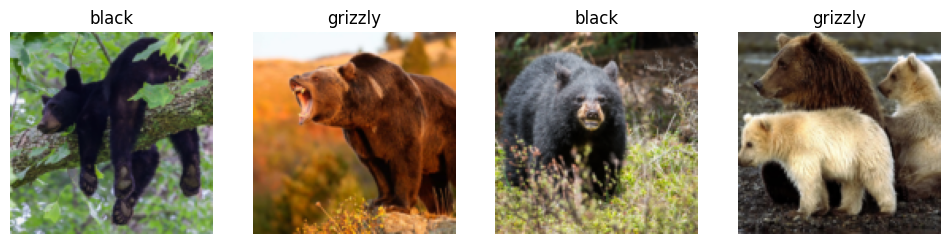

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

By default, "Resize" crops the images to fit a square shape of the size requested, using the full width or height
This can result in losing some important data
Alternatively, you can ask fastai to pad the images with zeros (black) or squish / stretch them

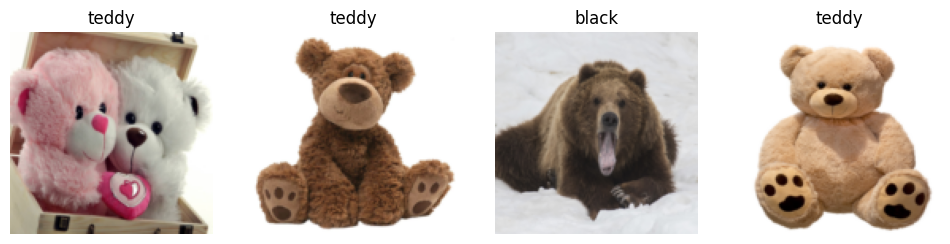

In [7]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.show_batch(max_n=4, nrows=1)

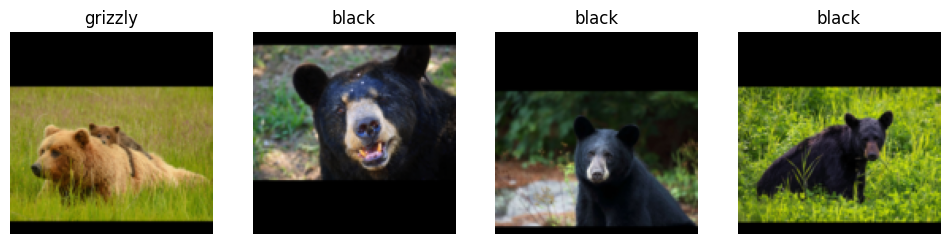

In [9]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = bears.dataloaders(path)
dls.show_batch(max_n=4, nrows=1)

These approaches seem wasteful or problematic
They might become unrealistic shapes, leading to a model that learns things that looks different from how they actually are (lowering accuracy as a result)

If we crop the image, we might crop out key features that could have been used by the model

If we pad the image, we will be lowering the effective resolution for the part of the image we actually use

What we normally do in practice is to randomly select part of the image, and crop to just that part
On each epoch (one complete pass of all of our images in the dataset), we randomly select a different part of each image
Our model can focus and learn to recognize different features in our images, also reflect how images work in the real world, different photos of the same thing may be framed in slightly different ways
- There is `RandomResizedCrop` that we can use instead of `Resize`
- For `RandomResizedCrop`, the `min_scale` can be passed, this determines how much of the image to select as a min each time

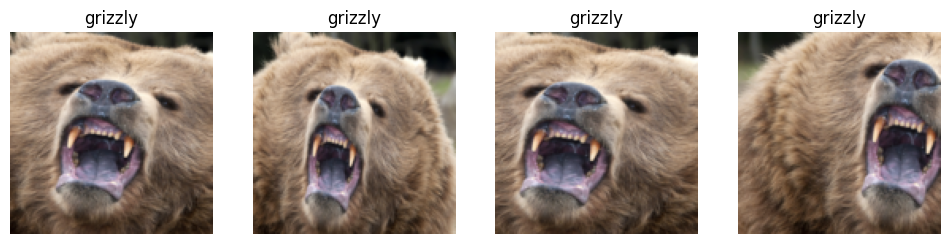

In [16]:
# new(self, item_tfms: 'list' = None, batch_tfms: 'list' = None)
#  |      Create a new `DataBlock` with other `item_tfms` and `batch_tfms`
# help(bears.new())

# https://forums.fast.ai/t/min-scale-and-ratio-in-randomresizedcrop/90659/2
# if min_scale=0.3, 30% of image needs to be selected
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True) # unique=True to have the same image repeated with different versions of the RandomResizedCrop transform

# Data Augmentation
Data augmentation refers to creating random variations of our input data, such that they appear different but do not actually change the meaning of our data
e.g. rotation, flipping, perspective warping, brightness changes, contrast changes

Standard set of augmentations are provided with the `aug_transforms` function
As our images are the same size, we can apply these augmentations to an entire batch of them using the GPU, saving a lot of time

To tell fastai that we want these transforms on a batch, we use the `batch_tfms` parameter
We are not using RandomResizedCrop in this example, to show the differences clearly

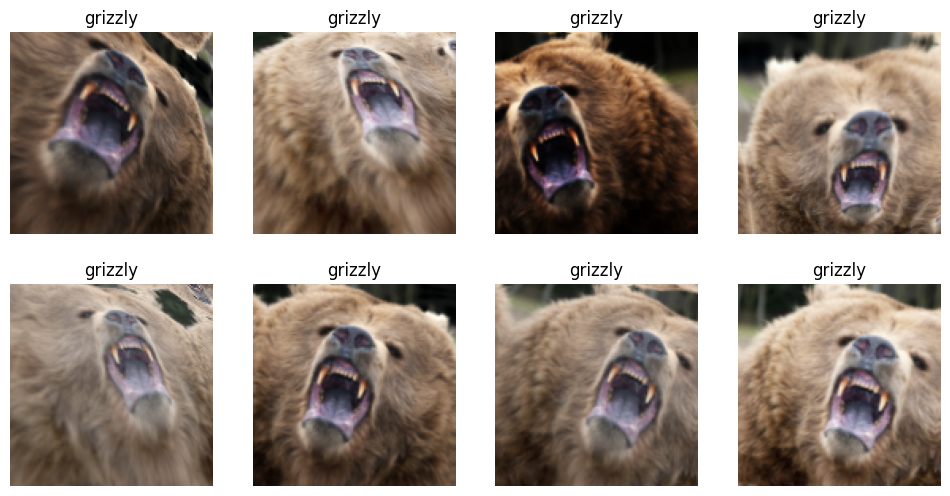

In [20]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2)) # mult=2 just to exaggerate the effect
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# Training your model and using it to clean your data
We don't have a lot of data (150 pictures of each sort of bear at most)
We will use RandomResizedCrop with an image of size 224 px (standard for image classification) and default aug_transforms (data augmentation)

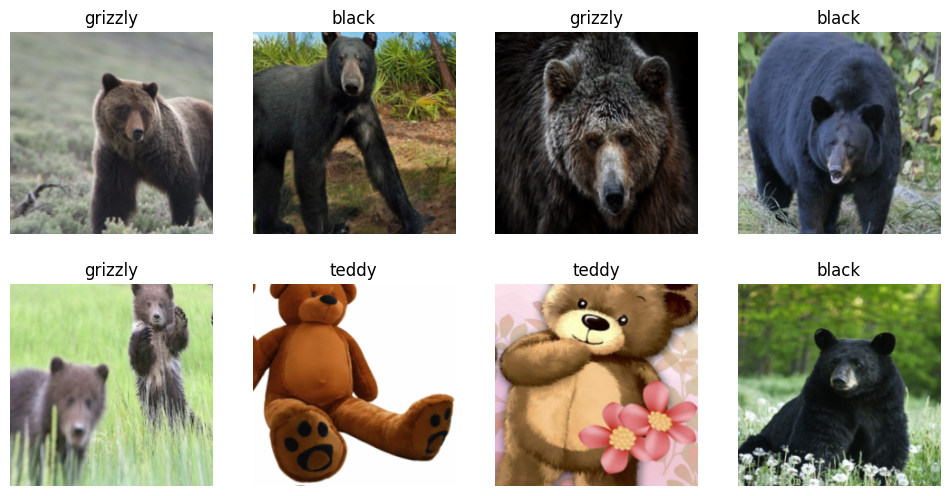

In [3]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
dls.show_batch(max_n=8, nrows=2)

In [5]:
learner = vision_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.316246,0.243488,0.111111,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.395818,0.075387,0.037037,00:08
1,0.282887,0.026601,0.000000,00:08
2,0.206190,0.018189,0.000000,00:08
3,0.179197,0.018618,0.000000,00:08


In [6]:
# https://stackoverflow.com/questions/48152674/how-do-i-check-if-pytorch-is-using-the-gpu
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())

current_device = torch.cuda.current_device()
print(current_device)
print(torch.cuda.device(current_device))
print(torch.cuda.get_device_name(current_device))

True
1
0
NVIDIA GeForce RTX 3070


In [ ]:
# Confusion matrix, check if mistakes in model are critical (e.g. mistaking grizzlies for teddies)
# Diagonal is the images that were classified correctly
# Calculated using validation set
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

It's helpful to see where exactly our errors are occurring, to see whether they're due to a dataset problem (e.g., images that aren't bears at all, or are labeled incorrectly, etc.), or a model problem (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.). To do this, we can sort our images by their loss.

The loss is a number that is higher if the model is incorrect (especially if it is confident of its wrong answer), or it is correct, but not confident of its correct answer

In a couple of chapters we'll learn in depth how loss is calculated and used in the training process. For now, plot_top_losses shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction, actual (target label), loss, and probability. The probability here is the confidence level, from zero to one, that the model has assigned to its prediction:

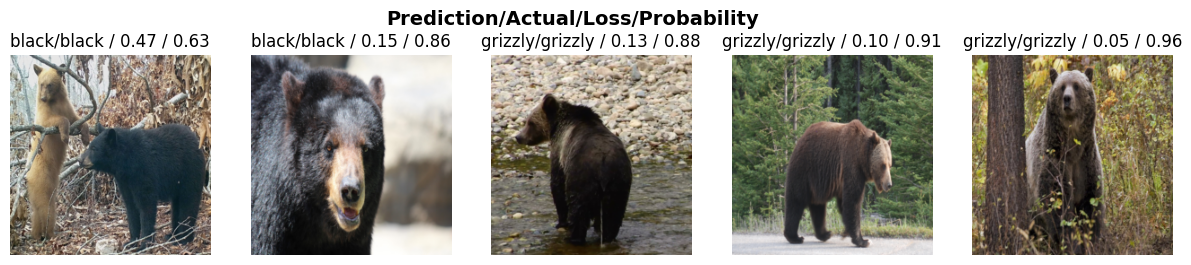

In [8]:
interp.plot_top_losses(5, nrows=1)

The intuitive approach to doing data cleaning is to do it before you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

fastai includes a handy GUI for data cleaning called ImageClassifierCleaner that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [28]:
# https://forums.fast.ai/t/imageclassifiercleaner-is-not-defined/100464
from fastai.vision.widgets import *
from PIL import Image

cleaner = ImageClassifierCleaner(learner)
cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Turning your model into an online application
Using the model for inference
- you need to save this model once you are happy with its performance


A model consists of two parts: architecture and the trained parameters
- The easiest way is to save both, so that when we load the model, we can be sure to have matching architecture and parameters
- Use the `export` method to save the model's both parts
This method saves the definition of how you created your DataLoaders. Otherwise you have to redefine how to transform your data in order to use your model in production

When you call export, fastai will save a file called "export.pkl"

In [ ]:
learner.export()

In [29]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

When we use a model for getting predictions, instead of training, we call it inference. To create our inference learner from the exported file, we use load_learner (in this case, this isn't really necessary, since we already have a working Learner in our notebook; we're just doing it here so you can see the whole process end-to-end):

In [30]:
path = Path()
learn_inf = load_learner(path/"export.pkl")
result = learn_inf.predict("images/grizzly_bear.jpg")
print(result)
# returns predicted category in the format you originally provided, index or predicted category, probabilities of each category
# pred, pred_idx, probs
# probs are based on learn_inf.dls.vocab
# lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

('grizzly', tensor(1), tensor([5.4604e-05, 9.9995e-01, 1.7072e-07]))


In [31]:
learn_inf.dls.vocab

# We can see here that if we index into the vocab with the integer returned by predict then we get back "grizzly," as expected. Also, note that if we index into the list of probabilities, we see a nearly 1.00 probability that this is a grizzly.

['black', 'grizzly', 'teddy']

# Deploying your app

As you now know, you need a GPU to train nearly any useful deep learning model. So, do you need a GPU to use that model in production? No! You almost certainly do not need a GPU to serve your model in production. There are a few reasons for this:
- As we've seen, GPUs are only useful when they do lots of identical work in parallel. If you're doing (say) image classification, then you'll normally be classifying just one user's image at a time, and there isn't normally enough work to do in a single image to keep a GPU busy for long enough for it to be very efficient. So, a CPU will often be more cost-effective.
- An alternative could be to wait for a few users to submit their images, and then batch them up and process them all at once on a GPU. But then you're asking your users to wait, rather than getting answers straight away! And you need a high-volume site for this to be workable. If you do need this functionality, you can use a tool such as Microsoft's ONNX Runtime, or AWS Sagemaker
- The complexities of dealing with GPU inference are significant. In particular, the GPU's memory will need careful manual management, and you'll need a careful queueing system to ensure you only process one batch at a time.
- There's a lot more market competition in CPU than GPU servers, as a result of which there are much cheaper options available for CPU servers.

# How to Avoid Disaster
A big part of the issue is that the kinds of photos that people are most likely to upload to the internet are the kinds of photos that do a good job of clearly and artistically displaying their subject matter—which isn't the kind of input this system is going to be getting. So, we may need to do a lot of our own data collection and labelling to create a useful system.

This is just one example of the more general problem of out-of-domain data. That is to say, there may be data that our model sees in production which is very different to what it saw during training. There isn't really a complete technical solution to this problem; instead, we have to be careful about our approach to rolling out the technology.

There are other reasons we need to be careful too. One very common problem is domain shift, where the type of data that our model sees changes over time. For instance, an insurance company may use a deep learning model as part of its pricing and risk algorithm, but over time the types of customers that the company attracts, and the types of risks they represent, may change so much that the original training data is no longer relevant.